<a href="https://colab.research.google.com/github/mi622/EDP/blob/main/M%C3%A9todo_de_M%C3%ADnimos_Cuadr%C3%A1dos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<span style="color:magenta;">**MÉTODO DE MÍNIMOS CUADRÁTICOS**</span>
<span style="color:blue;"></span>

Considera el problema de valor inicial


$$u''+u=x \quad$$ con condiciones

con las condiciones $$u(0)=0 \quad \text{&} \quad  u'(0)=2$$

Encuentra una solución aproximada de la forma

$$u_N =\alpha_0 +\alpha_1 x + \alpha_2 x^2 + \alpha_3 x^3 + ...$$

pero ahora usa el método de mínimos cuadrados para encontrar una solución aproximada.
Compara esta solución con la del Ejercicio 5.1.

---

***Solución***


In [46]:
#librerias

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Se importan las librerias Sympy para cálculo simbólico, numpy para convertir a un arreglo y matplotlib para graficar

#<span style="color:green;">**Solución de la EDO**</span>
<span style="color:blue;"></span>

$$u''+u=x$$

con

$$u(0)=0 \quad \text{ y } \quad u(0)'=2$$

In [47]:
#  Se define la variable independiente x y la función u(x)   para plantear la EDO.

x, a, b= sp.symbols('x a b') #introducimos 3 variables que se utilizarán más adelante
u = sp.Function('u') #esto es una función

Se define una variable y una función para plantear y darle solución a la EDO

In [48]:
#  Se plantea la EDO: u''(x) + u(x) = x

ode = u(x).diff(x,x) + u(x) - x #Es la edo planteada
sp.dsolve(ode,u(x)) #Resuelve la EDO


Eq(u(x), C1*sin(x) + C2*cos(x) + x)

Se define una variable y una función para plantear y darle solución a la EDO

In [49]:
ode = u(x).diff(x,x) + u(x) - x #Es la edo planteada
sp.dsolve(ode,u(x)) #Resuelve la EDO

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

Se plantea y resuelve la EDO

In [50]:

sol = sp.dsolve(ode, ics={u(0):0, u(x).diff(x).subs(x, 0): 2}) #ics es una estructura de diccionario




Se introducen las condiciones iniciales para obtener una solución especifica

In [51]:

sol

Eq(u(x), x + sin(x))

Solución de la EDO una vez aplicadas las condiciones iniciales

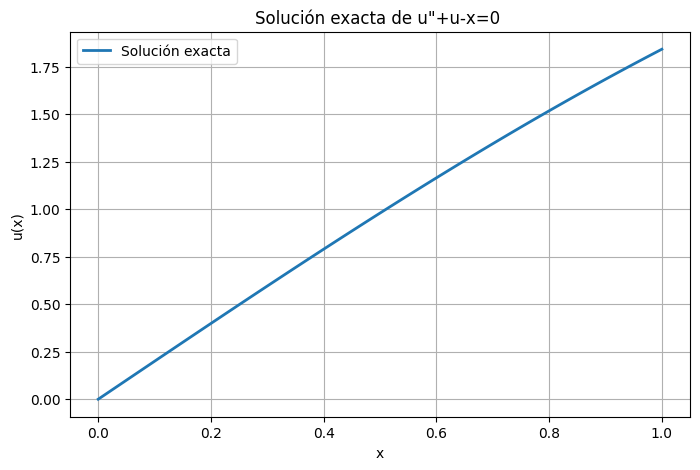

In [52]:
# convertimos en un arreglo
u_expr = sol.rhs

u_num = sp.lambdify(x,u_expr,"numpy")

xx = np.linspace(0,1,100)
yy = u_num(xx)

plt.figure(figsize=(8,5))
plt.plot(xx, yy, label=f'Solución exacta', linewidth=2)
plt.title('Solución exacta de u"+u-x=0 ')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()


Gráfica de la solución exacta de la EDO en el intervalo [0,1]

#<span style="color:green;">**Solucion numérica**</span>
<span style="color:blue;"></span>


De igual forma al ejercicio 5.1 (se restringe a un polinomio cúbico)

$$u_N =\alpha_0 +\alpha_1 x + \alpha_2 x^2 + \alpha_3x^3$$

Donde además

$$u_N(0)=0$$

$$u_N'(0)=2$$

Esto es:

$$u_N(0) =\alpha_0 =0$$

$$u_N' =\alpha_1 + 2\alpha_2 x + 3\alpha_3x^2$$

$$u'_N(0)=\alpha_1=2$$

Por lo tanto

$$\alpha_0=0 \quad \text{ y } \quad \alpha_1=2$$

$$u_N =2 x + \alpha_2 x^2 + \alpha_3x^3$$

In [53]:
u_n = 2*x + a*x**2 + b*x**3

u_n

a*x**2 + b*x**3 + 2*x

Se tiene a  $u_N$   como propuesta de solución

In [54]:
u_n_2 = sp.diff(u_n,x,2) #deriva dos veces con respecto de x a u_n

E = u_n_2 + u_n - x  #Se plantea el error

E

a*x**2 + b*x**3 + x + 2*(a + 3*b*x)

Se define el error E como la EDO del problema

In [55]:

I= sp.integrate(E**2,(x,0,1)) #Integra la función E^2 con respecto de x de 0 a 1

Se aplica el método de mínimos cuadrados que consiste en minimizar

$\int_0^1 E^2 dx$

De modo que se integra $E^2$ con respecto de x en el intervalo [0,1]

In [56]:

I

83*a**2/15 + 49*a*b/3 + 5*a/2 + 509*b**2/35 + 22*b/5 + 1/3

Se obtiene de integrar $E^2$

In [57]:
dIa= sp.diff(I,a) #derivada parcial de I con reespecto de a
dIb = sp.diff(I,b) #derivada parcial de I con respecto de b

Ahora se aplica regla de Leibniz cuando los parametros de la integral son constantes, por lo que ahora se hacen las derivadas parciales del resultado con respecto de $\alpha_2 $ y $ \alpha_3$ que en este caso se les llamó a y b respectivamente

In [58]:
dIa

166*a/15 + 49*b/3 + 5/2

Derivada parcial con respecto de a

In [59]:
dIb

49*a/3 + 1018*b/35 + 22/5

Se obtuvo un sistema de ecuaciones al realizar las derivadas parciales anteriores

In [60]:
soleq = sp.solve([dIa,dIb],[a,b], simplify=True) #Resuelve el sistema para a y b

Se resuelve el sistema de ecuaciones para a y b

In [61]:
soleq

{a: -1335/86789, b: -24759/173578}

Se obtienen los coeficientes de a y b respectivamente

In [62]:
u_approx=u_n.subs(soleq) #Sustituye los valores de soleq en u_n

u_approx=u_n.subs(soleq) #Sustituye los valores de soleq en u_n

In [ ]:
u_approx

solución numérica obtenida

In [63]:
u_approx_fn = sp.lambdify(x,u_approx,"numpy") #Lo traansforma en arreglo numpy para graficar

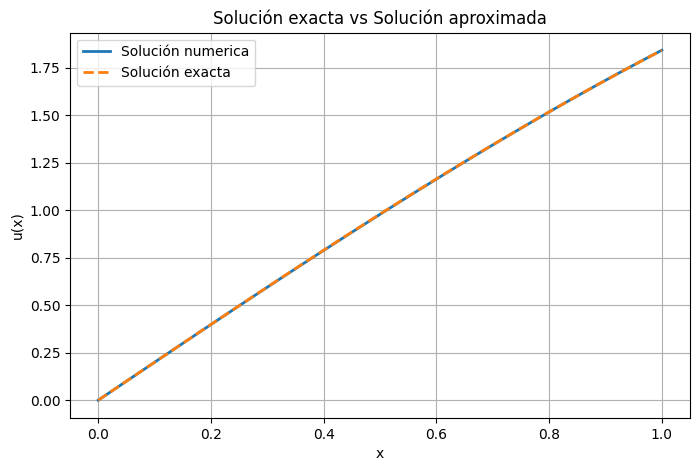

In [64]:
xx = np.linspace(0,1,100)

plt.figure(figsize=(8,5))
plt.plot(xx, u_approx_fn(xx), label=f'Solución numerica', linewidth=2)
plt.plot(xx, yy,"--" ,label=f'Solución exacta', linewidth=2)
plt.title('Solución exacta vs Solución aproximada')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

Gráficas de las solución exacta y la solución numérica con el método de mínimos cuadrados en el intervalo [0,1].
Nótese que prácticamente son iguales en el intervalo, con un error casi 0

#Error de la solución numérica

Se usó el error puntual o absoluto

$E(x)=u(x)-u_N(x)$

Es decir, en cada punto $x$ la diferencia entre la solución exacta y la aproximación.

In [65]:
# solución exacta
u_exact = x + sp.sin(x)

# solución numérica
u_N = -(sp.Rational(24759,173578))*x**3 - (sp.Rational(1335,86789))*x**2 + 2*x

# error simbólico
E = sp.simplify(u_exact - u_N)
sp.simplify(E)

24759*x**3/173578 + 1335*x**2/86789 - x + sin(x)

Este es el error "general" de la función, solo bastaría seleccionar un punto y evaluar en $E(x)$ para obtener una representación numérica del error en dicho punto ya que no se especifica en que puntos se evalúa

#Comparativa entre Mínimos cuadrados y Método de colocación (5.1)

MÉTODO DE MÍNIMOS CUADRADOS (Ejercicio 5.8)

Se busca minimizar la integral del cuadrado del error:
$$∫_0^1 [F(x)]² dx$$
    Las ecuaciones normales se obtienen como:
$$∫_0^1 F(x)*L[ψ_i](x) dx = 0,   para ψ₂=x² y ψ₃=x³$$

In [66]:
u_N2 = -(sp.Rational(2,17))*x**3 - (sp.Rational(1,17))*x**2 + 2*x #Aproximación del ejercicio 5.1

Se define la aproximación numérica obtenida en el ejercicio 5.1

In [67]:
u_approx_fn2 = sp.lambdify(x,u_N2,"numpy") #Se convierte a un arreglo numpy para graficar

Se convierte a un arreglo numpy para apreciar las gráficas

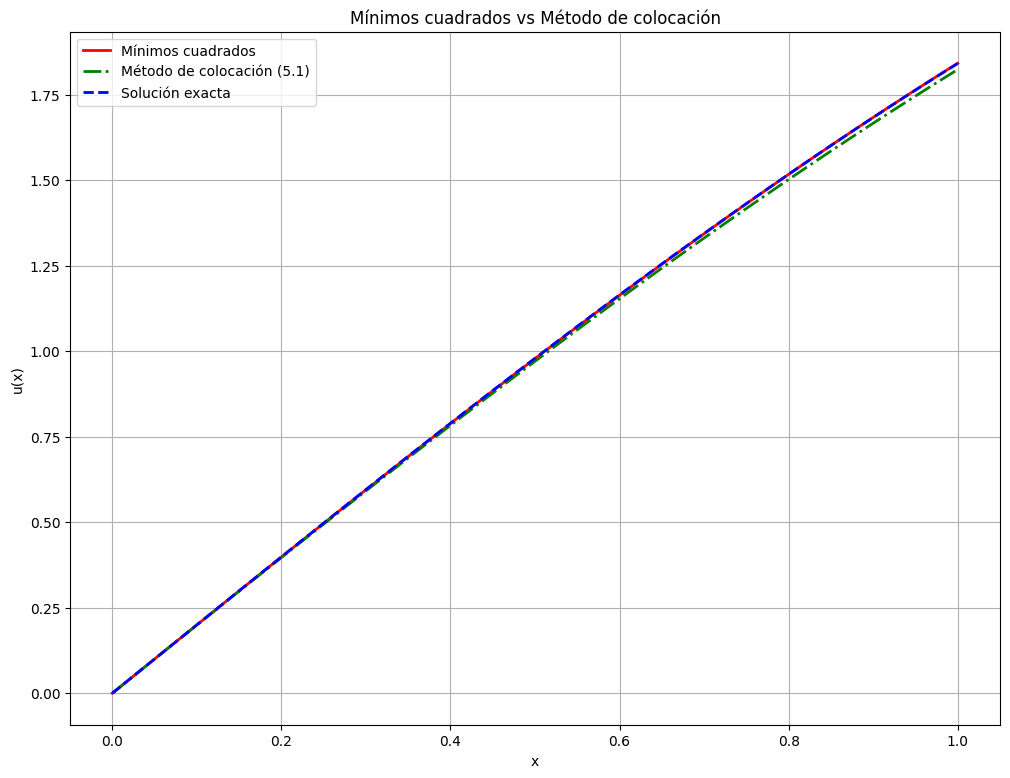

In [73]:
xx = np.linspace(0,1,100)

plt.figure(figsize=(12,9))
plt.plot(xx, u_approx_fn(xx), label=f'Mínimos cuadrados', linewidth=2, color='red')
plt.plot(xx, u_approx_fn2(xx),"-." ,label=f'Método de colocación (5.1)', linewidth=2, color="green")
plt.plot(xx, yy,"--" ,label=f'Solución exacta', linewidth=2, color="blue")
plt.title('Mínimos cuadrados vs Método de colocación')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

Aquí se observa la comparativa de la solución exacta contra las aproximaciones por mínimos cuadrados (ejercicio actual) y por el método de colocación (ejercicio 5.1).
El error es mínimo; sin embargo en esta ocasión se ve superioridad del método de mínimos cuadrados sobre el método de colocación